In [1]:
import yt 
import numpy as np 
import animation 

obj = animation.loadRun("3d_runs/hybrid_scheme_15.npz")



In [16]:
import yt_idv

In [17]:
rc = yt_idv.render_context()
rc.add_scene(ds, "density")
rc.run()

Setting position 1688.0 344.0


/home/xerox/anaconda3/lib/python3.8/site-packages/yt/data_objects/data_containers.py:1421: VisibleDeprecationWarning: The requested field name 'density' is ambiguous and corresponds to any one of the following field types:
 {'gas', 'stream'}
Please specify the requested field as an explicit tuple (ftype, fname).
Defaulting to '("gas", "density")'.
Deprecated since v4.0.0. This feature will be removed in v4.1.0
  finfo = self.ds._get_field_info(field)


Computed new cmap values 0.0018955868436023593 - 0.9302855134010315


In [4]:
config, psi, density, phase = obj

In [6]:
data = dict(density = (density, "g/cm**3"))

bbox = np.array([[-1.5, 1.5], [-1.5, 1.5], [-1.5, 1.5]])
ds = yt.load_uniform_grid(data, density.shape, length_unit="Mpc", bbox=bbox, nprocs=64)

yt : [INFO     ] 2022-04-14 16:10:55,159 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-04-14 16:10:55,160 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2022-04-14 16:10:55,163 Parameters: domain_left_edge          = [-1.5 -1.5 -1.5]
yt : [INFO     ] 2022-04-14 16:10:55,165 Parameters: domain_right_edge         = [1.5 1.5 1.5]
yt : [INFO     ] 2022-04-14 16:10:55,166 Parameters: cosmological_simulation   = 0


yt : [INFO     ] 2022-04-14 16:11:17,372 xlim = -1.500000 1.500000
yt : [INFO     ] 2022-04-14 16:11:17,373 ylim = -1.500000 1.500000
yt : [INFO     ] 2022-04-14 16:11:17,375 xlim = -1.500000 1.500000
yt : [INFO     ] 2022-04-14 16:11:17,376 ylim = -1.500000 1.500000
yt : [INFO     ] 2022-04-14 16:11:17,378 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



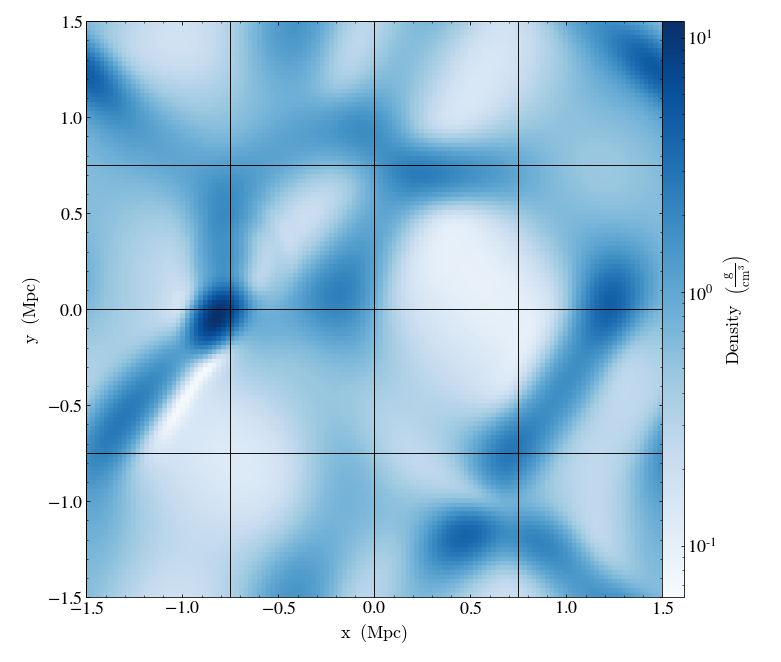

In [7]:


slc = yt.SlicePlot(ds, "z", ("gas", "density"))
slc.set_cmap(("gas", "density"), "Blues")
slc.annotate_grids(cmap=None)
slc.show()



In [10]:


#Find the min and max of the field
mi, ma = ds.all_data().quantities.extrema('density')
#Reduce the dynamic range
mi = mi.value + 1.5e7
ma = ma.value - 0.81e7



In [11]:


# Choose a vector representing the viewing direction.
L = [0.5, 0.5, 0.5]
# Define the center of the camera to be the domain center
c = ds.domain_center[0]
# Define the width of the image
W = 1.5*ds.domain_width[0]
# Define the number of pixels to render
Npixels = 512



In [14]:


sc = yt.create_scene(ds, 'density')
dd = ds.all_data()

source = sc[0]

source.log_field = True

tf = yt.ColorTransferFunction((mi, ma), grey_opacity=False)
tf.map_to_colormap(mi, ma, scale=15.0, colormap="cmyt.algae")

source.set_transfer_function(tf)

sc.add_source(source)

cam = sc.add_camera()
cam.width = W
cam.center = c
cam.normal_vector = L
cam.north_vector = [0, 0, 1]



/home/xerox/anaconda3/lib/python3.8/site-packages/yt/data_objects/data_containers.py:1421: VisibleDeprecationWarning: The requested field name 'density' is ambiguous and corresponds to any one of the following field types:
 {'gas', 'stream'}
Please specify the requested field as an explicit tuple (ftype, fname).
Defaulting to '("gas", "density")'.
Deprecated since v4.0.0. This feature will be removed in v4.1.0
  finfo = self.ds._get_field_info(field)


yt : [INFO     ] 2022-04-14 16:14:01,838 Rendering scene (Can take a while).
yt : [INFO     ] 2022-04-14 16:14:01,845 Creating volume
/home/xerox/anaconda3/lib/python3.8/site-packages/yt/data_objects/image_array.py:331: RuntimeWarning: Mean of empty slice.
  out.swapaxes(0, 1), filename, nz.mean() + sigma_clip * nz.std()
/home/xerox/anaconda3/lib/python3.8/site-packages/unyt/array.py:1778: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(
/home/xerox/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


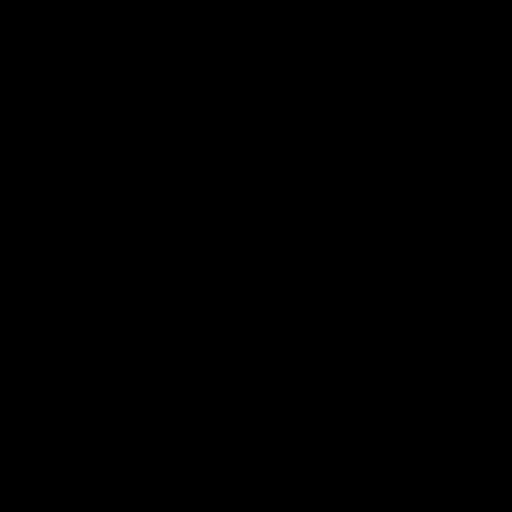

In [15]:
sc.show(sigma_clip=4)